In [1]:
from cmeutils.dynamics import msd_from_gsd
from cmeutils.structure import dihedral_distribution, gsd_rdf
from cmeutils.sampling import is_equilibrated, equil_sample

import gsd.hoomd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import signac
from scipy.optimize import curve_fit
from scipy.stats import linregress

import os

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


In [2]:
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
pair_symbol_dict = {"E-E": "o", "K-K": "s", "E-K": "^"}
pair_colors = {"E-E": "#00A866", "K-K": "#008EA8", "E-K": "#F5AD18"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 1
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 3

In [3]:
project = signac.get_project("../coarse-grain-sims/dt-sweep/polybinder-flow/")

In [2]:
(2.901 / 0.435 ) * 10

66.68965517241378

3.0 0.0003 2.9984 0.435
3.0 0.0005 3.0009 0.725
3.0 0.0007 2.9989 1.015
3.0 0.001 2.996 1.45
3.0 0.002 3.0078 2.901
3.0 0.004 2.9899 5.801
3.0 0.006 2.9864 8.702


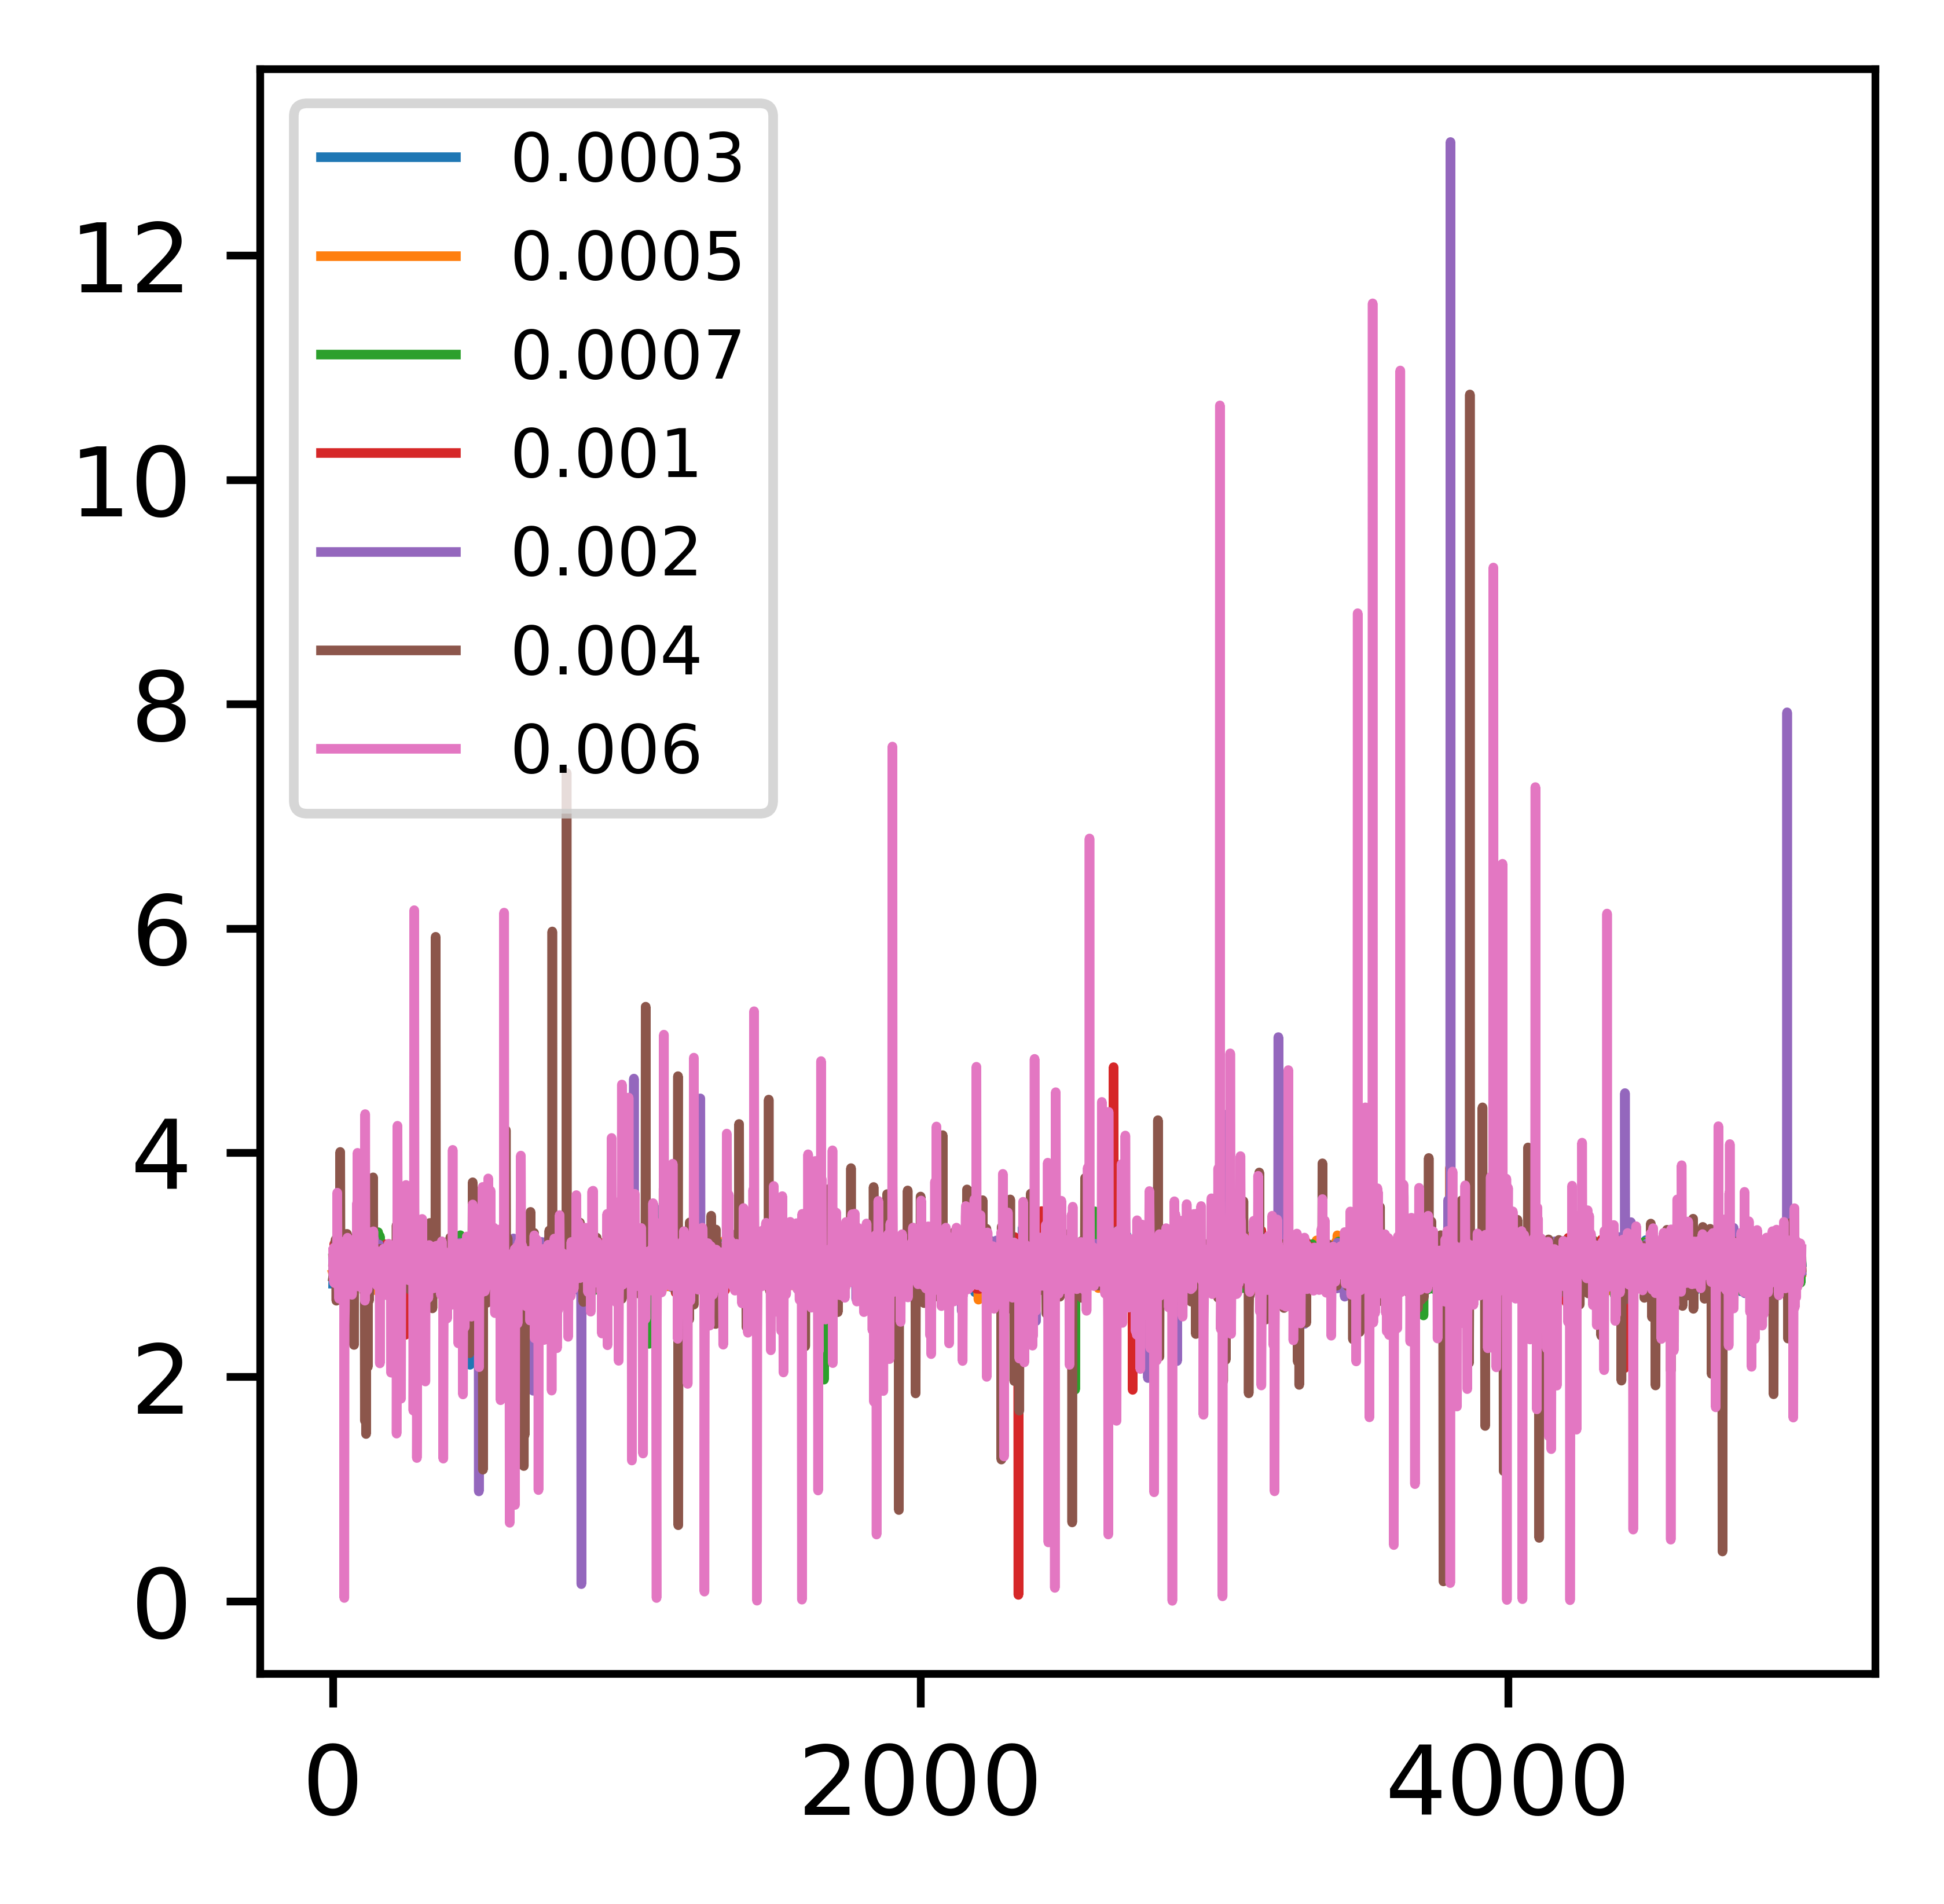

In [6]:
for dt, job in project.find_jobs({"cg_potentials_dir": "msibi-deep"}).groupby("dt"):
    for job in job:
        data = np.genfromtxt(job.fn("sim_traj.txt"), names=True)
        temp = data["mdcomputeThermodynamicQuantitieskinetic_temperature"]
        sample = equil_sample(temp[-5000:])[0]
        plt.plot(temp[-5000:], label=dt)
        print(job.sp.kT_quench, dt, np.round(np.mean(sample), 4), job.doc.real_timestep)
        
plt.legend()

In [11]:
job.doc

{'done': True, 'steps': 20000000, 'sample_pdi': False, 'ref_energy': 0.21, 'ref_distance': 3.3997, 'ref_mass': 15.99, 'real_timestep': 8.702, 'time_unit': 'fs', 'steps_per_frame': 10000, 'steps_per_log': 2000, 'T_SI': 317.0, 'T_unit': 'K'}